## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

###  Домашнее задание №3. Обработка текстов. Линейная классификация.

Задание выполнил(а): Целищев Иван

### Общая информация
__Дата выдачи:__ 28.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_03_Фамилия_Имя.ipynb

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

В задании вам предоставлены реальные текстовые данные. 

Необходимо построить алгоритм, который будет по тексту документа определять тип источника:
 - Микроблоги
 - Новости
 - Отзывы
 - Форумы
 - Блоги
 - Видео
 - Мессенджеры

## Часть 1. Работа с текстовыми данными

 ### 1. Исследование данных

[2 балла]

Скачаем данные отсюда:
https://yadi.sk/d/o3cPgFAq5gALiw

In [2]:
D = pd.read_csv('texts_dataset.csv', sep=';', index_col=0)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
D.head()

,Дата,ID сообщения,Заголовок,Текст,Дублей,Тип источника
0,27.04.2019 13:18,1396238,NaN,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",1.0,Микроблоги
1,27.04.2019 13:15,1396239,NaN,Почему Немагия сделала обзор на Тинькова? #нем...,1.0,Микроблоги
2,27.04.2019 13:10,1396248,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",2.0,Новости
3,27.04.2019 13:06,1396243,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",2.0,Новости
4,27.04.2019 13:03,1396186,Тинькофф Страхование: Не купить полис без подп...,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,1.0,Отзывы


Далее будем использовать лишь поля  "Текст", "Тип источника"

In [4]:
D = D[[ "Текст", "Тип источника"]]

In [5]:
D.head()

,Текст,Тип источника
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [6]:
for i in D['Тип источника'].unique():
    print (i)

Микроблоги
Новости
Отзывы
Форумы
Блоги
Видео
Мессенджеры
nan


In [7]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200206 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199578 non-null object
Тип источника    199993 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


Удалим объекты с пропусками

In [8]:
D.dropna(axis = 0, inplace=True)

#### 1.1 Выведите среднюю длину текстов в каждом классе. Что можно сказать о данных? Что можно сказать о каждом классе?

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Средние длины(количество слов) в зависимости от типа :')
print('Микроблоги :', np.mean(list(map(len,D[D['Тип источника'] == 'Микроблоги']['Текст'].str.split()))))
print('Новости :', np.mean(list(map(len,D[D['Тип источника'] == 'Новости']['Текст'].str.split()))))
print('Отзывы :', np.mean(list(map(len,D[D['Тип источника'] == 'Отзывы']['Текст'].str.split()))))
print('Форумы :', np.mean(list(map(len,D[D['Тип источника'] == 'Форумы']['Текст'].str.split()))))
print('Блоги :', np.mean(list(map(len,D[D['Тип источника'] == 'Блоги']['Текст'].str.split()))))
print('Видео :', np.mean(list(map(len,D[D['Тип источника'] == 'Видео']['Текст'].str.split()))))
print('Мессенджеры :', np.mean(list(map(len,D[D['Тип источника'] == 'Мессенджеры']['Текст'].str.split()))))

Средние длины(количество слов) в зависимости от типа :
Микроблоги : 22.639953757225435
Новости : 348.76277276542174
Отзывы : 80.81043781725889
Форумы : 69.05979518629947
Блоги : 483.9022399392559
Видео : 117.08529411764705
Мессенджеры : 130.15199740175382


Данные довольно большие, самое маленькое среднее - 22.64 слова. Микроблоги - меньше всего слов. Блоги - больше всего слов. Видео и мессенджеры примерно одинаковы(117 и 130 слов в среднем). Аналогично форумы и отзывы(69 и 81)

#### 1.2 Приведите тексты к нижнему регистру и токенезируйте их

используйте word_tokenize из nltk.tokenize

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import nltk
from nltk.tokenize import word_tokenize
D['Текст'] = D.apply(lambda row: (row['Текст'].lower()), axis=1)
D['Текст'] = D.apply(lambda row: nltk.word_tokenize(row['Текст']), axis=1)

#### 1.3 Оставьте в каждом документе токены содержащие  только буквы русского или английского алфавита.


In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import re
regex = re.compile('[^a-zA-Zа-яА-я]')
D['Текст'] = D.apply(lambda row: (list(filter(None, [regex.sub('', w) for w in row['Текст']]))), axis=1)

#### 1.4 Выведите 20 слов, которые встечаются в наибольшем числе документов. Что можно сказать об этих словах?

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from itertools import groupby
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
fr = D['Текст'].copy()
X = cnt_vec.fit_transform(fr.apply(lambda row: ' '.join(set(row))))
frequencies = list(zip(cnt_vec.get_feature_names(), X.sum(axis=0).tolist()[0]))
print(*(sorted(frequencies, key=lambda x: -x[1]))[:20])

('на', 117697) ('не', 110262) ('тинькофф', 105818) ('банк', 94084) ('по', 84618) ('что', 82930) ('за', 68368) ('банка', 62690) ('как', 60864) ('это', 59311) ('для', 55173) ('так', 50145) ('от', 49701) ('но', 47230) ('все', 45408) ('если', 43466) ('из', 41108) ('то', 40284) ('или', 39851) ('пишет', 39709)


Почти все слова - частицы, союзы или предлоги. Наверное, надо было ввести стоп-слова

#### 1.5 Выведите 20 слов, которые встечаются в наименьшем числе документов 

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(*(sorted(frequencies, key=lambda x: -x[1]))[-20:])

('яшанькиным', 1) ('яшей', 1) ('яшка', 1) ('яшки', 1) ('яшкин', 1) ('яшкура', 1) ('яшма', 1) ('ящере', 1) ('ящерица', 1) ('ящеров', 1) ('ящикамя', 1) ('ящичек', 1) ('ящички', 1) ('ящур', 1) ('яыва', 1) ('яывы', 1) ('яывя', 1) ('яыя', 1) ('яэто', 1) ('яюнармия', 1)


### 2. Подготовка данных

[3 балла]

####  2.1 Разделите выборку на обучающую и тестовую в соотношении 70:30

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(D['Текст'], D['Тип источника'], test_size=0.3, random_state=13)
forstem = X_train.copy()
forstemtest = X_test.copy()

#### 2.2 Обучите BOW векторы на обучающей выборке и примените преобразование к обучающей и тестовой

In [15]:
X_train = X_train.apply(lambda x: ' '.join([w for w in x]))
X_test = X_test.apply(lambda x: ' '.join([w for w in x]))

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
cnt_train = CountVectorizer(stop_words=None)
B = cnt_train.fit_transform(X_train)
Vtest = cnt_train.transform(X_test)

#### 2.3 Обучите TFIDF векторы на обучающей выборке и примените преобразование к тестовой

In [17]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
T = tfidf_vec.fit_transform(X_train)
Ttest = tfidf_vec.transform(X_test)

#### 2.4 Примените стемминг к текстам обучающей и тестовой выборки. Обучите TFIDF векторы на полученных данных.

In [18]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian' or 'english')
tfidf = TfidfVectorizer()

In [19]:
forstem = forstem.apply(lambda x: ' '.join([stemmer.stem(w) for w in x]))
forstemtest = forstemtest.apply(lambda x: ' '.join([stemmer.stem(w) for w in x]))

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
TSTEM = tfidf.fit_transform(forstem)
Stest = tfidf.transform(forstemtest)

#### 2.5 Сравните размеры полученных матриц

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print('Bag of words :', B.shape, Vtest.shape)
print('TFIDF :', T.shape, Ttest.shape)
print('TFIDF(Stem) :', TSTEM.shape, Stest.shape)

Bag of words : (139697, 349177) (59871, 349177)
TFIDF : (139697, 349177) (59871, 349177)
TFIDF(Stem) : (139697, 189005) (59871, 189005)


### 3. Обучение модели и оценка результатов

[2 балла]

#### 3.1 Обучите логистическую регрессию SGDClassifier на данных, полученных в пунктах 2.2, 2.3 и 2.4.
#### Оцените качество на отложенной выборке по метрике accuracy

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [23]:
sgdbow = SGDClassifier()
sgdbow.fit(B, y_train)
ybow = sgdbow.predict(Vtest)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [24]:
sgdtfidf = SGDClassifier()
sgdtfidf.fit(T, y_train)
ytfidf = sgdtfidf.predict(Ttest)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [25]:
sgdtfidfstem = SGDClassifier()
sgdtfidfstem.fit(TSTEM, y_train)
ystem = sgdtfidfstem.predict(Stest)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [26]:
print('Accuracies :')
print('Bow :', accuracy_score(y_test, ybow))
print('TFIDF :', accuracy_score(y_test, ytfidf))
print('TFIDF(stemm) :', accuracy_score(y_test, ystem))

Accuracies :
Bow : 0.8437974979539343
TFIDF : 0.8388702376776737
TFIDF(stemm) : 0.8318551552504552


#### 3.2 Какой алгоритм показал наилучшее качество классификации? Как это можно объяснить?

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Наилучшее качество показал BOW. Возможно, данный результат объясняется тем, что во многих документах присутствовали слова(частицы и тд из пункта 1.4(самые популярные)), которые никак не помогают при обучении модели. 

#### 3.3 Выведите несколько документов из тестовой выборки, на которых были допущены ошибки. Что можно о них сказать?

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
data = pd.DataFrame(data=np.array([X_test, y_test, ybow]).T, columns = ['Текст', 'Истинные ответы','Предсказанные ответы'])
data = data.loc[(data['Истинные ответы'] != data['Предсказанные ответы'])]
data.sample(10)

,Текст,Истинные ответы,Предсказанные ответы
41522,июня года состоится рассмотрение гражданского ...,Новости,Форумы
6098,почта банк лучший и самый высокотехнологичный ...,Новости,Отзывы
27467,справка операций по счету nbsp c по номер дого...,Отзывы,Новости
42366,входящий перевод на карту блэк от юрлица как т...,Форумы,Отзывы
50313,на яндекс деньги постоянно кешбеки без комисси...,Отзывы,Форумы
18993,весьма забавный банк один раз звонили и пытали...,Форумы,Отзывы
3643,кира расскажите пожалуйста подробно как именно...,Видео,Форумы
27173,тинькофф говорит что такого клиента вообще нет...,Отзывы,Форумы
19564,пора разобраться с тиньков банков во т здесь м...,Видео,Форумы
30873,жесть какая очень странно это туда в этом году...,Форумы,Отзывы


Часто алгоритм путает Форумы и Отзывы из за того, что тексты по этим темам особо не отличаются(ни по формату, ни по приципу написания)

In [32]:
data1 = pd.DataFrame(data=np.array([X_test, y_test, ytfidf]).T, columns = ['Текст', 'Истинные ответы','Предсказанные ответы'])
data1 = data1.loc[(data1['Истинные ответы'] != data1['Предсказанные ответы'])]
data1.sample(10)

,Текст,Истинные ответы,Предсказанные ответы
28964,россия вместе с великобританией и сша лидирует...,Блоги,Новости
44698,прилетелкоммент чудные дела от тинькофф банк о...,Мессенджеры,Отзывы
32373,платные справки не встречал справки для юрлиц ...,Отзывы,Форумы
3341,хочу кредитую карту ни один банк не дает даже ...,Новости,Форумы
40580,b хотелось бы знать это временное помутнение и...,Отзывы,Форумы
51544,вот в связи с нынешней паранойей насчет ухода ...,Блоги,Форумы
7615,ну если ты слышишь вопрос оператора после сбро...,Форумы,Отзывы
35117,тачка уезжает в тинькофф банк,Видео,Форумы
53386,хочется поделиться неожиданной болью с которой...,Новости,Форумы
11555,у тиньковбанка нет отделений совсем а работают...,Форумы,Новости


Та же история + иногда Новости с Форумами

In [34]:
data2 = pd.DataFrame(data=np.array([X_test, y_test, ystem]).T, columns = ['Текст', 'Истинные ответы','Предсказанные ответы'])
data2 = data2.loc[(data2['Истинные ответы'] != data2['Предсказанные ответы'])]
data2.sample(10)

,Текст,Истинные ответы,Предсказанные ответы
13189,цитата pizza отнюдь калви честный предпринимат...,Форумы,Новости
10419,чек банкомата нужен в первую очередь при попол...,Отзывы,Форумы
8577,странно банк россия в крыму пополняет карту бе...,Блоги,Форумы
3358,встречайте тинькофф stories в мобильном банке ...,Микроблоги,Форумы
27482,если шансы что банк ещ увеличит кредитный лими...,Форумы,Отзывы
15603,все что нужно знать о кэшбэке банки вам этого ...,Мессенджеры,Форумы
35608,не сообщили о превышении лимита бесплатного по...,Отзывы,Форумы
50493,являюсь клиентом вот уже года изначально все у...,Отзывы,Форумы
43178,ну вот что ж вы валентин нужно было купить у н...,Видео,Форумы
34279,новости за декабря apple впервые призналась в ...,Мессенджеры,Микроблоги


История с отзывами и форумами продолжается + Блоги и Новости + определение мессенджеров(15603, 34279)

#### 3.4 Постройте матрицу ошибок. Проанализируйте ее.

In [35]:
y_test.value_counts()

Форумы         20744
Отзывы         15240
Новости        11424
Микроблоги      6380
Видео           3614
Блоги           1568
Мессенджеры      901
Name: Тип источника, dtype: int64

In [36]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import confusion_matrix
col = ['Блоги', 'Видео', 'Мессенджеры','Микроблоги','Новости','Отзывы','Форумы']
pd.DataFrame(confusion_matrix(y_test, ybow), columns = col, index = col)

,Блоги,Видео,Мессенджеры,Микроблоги,Новости,Отзывы,Форумы
Блоги,331,58,17,88,481,128,465
Видео,4,2363,6,408,30,179,624
Мессенджеры,3,42,322,246,68,26,194
Микроблоги,0,83,2,5706,0,150,439
Новости,71,81,30,302,10024,167,749
Отзывы,6,41,0,117,36,13083,1957
Форумы,13,118,10,371,161,1381,18690


Данный алгоритм плохо отделяет блоги от новостей и форумов и не так часто как казалось ранее ошибается в паре отзывы и форумы

In [37]:
pd.DataFrame(confusion_matrix(y_test, ytfidf), columns = col, index = col)

,Блоги,Видео,Мессенджеры,Микроблоги,Новости,Отзывы,Форумы
Блоги,81,45,2,75,782,175,408
Видео,0,2272,1,290,90,237,724
Мессенджеры,2,37,106,189,339,38,190
Микроблоги,0,79,1,5467,74,189,570
Новости,0,23,2,56,10712,167,464
Отзывы,0,24,0,51,90,12839,2236
Форумы,3,101,2,209,427,1255,18747


Данный алгоритм сильно ошибается на блогах и в мессенджерах путая с новостями и все так же с форумами и отзывами

In [38]:
pd.DataFrame(confusion_matrix(y_test, ystem), columns = col, index = col)

,Блоги,Видео,Мессенджеры,Микроблоги,Новости,Отзывы,Форумы
Блоги,73,55,1,85,754,196,404
Видео,1,2301,0,256,90,330,636
Мессенджеры,1,38,97,188,345,32,200
Микроблоги,0,85,1,5471,57,174,592
Новости,0,32,2,56,10630,287,417
Отзывы,1,24,0,57,75,12872,2211
Форумы,6,118,1,215,408,1636,18360


У данного алгоритма еще немного хуже с блогами и мессенджерами + отзывы и форумы

## Часть 2. Логистическая регрессия.
[3 балла]

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [39]:
train = pd.read_csv('train.csv')

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.
​
Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [40]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
train['NewClasses'] = 0
train.loc[(train['price_range'] > 1), 'NewClasses'] = 1
train.drop(['price_range'], inplace = True, axis = 1)

Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, : 'wifi'],train['NewClasses'], test_size=0.3, random_state=13)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [42]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?
Не забывайте, что метод predict_proba вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [43]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
logregr = LogisticRegression()
logregr.fit(X_train, y_train)
y = logregr.predict(X_test)
yproba = logregr.predict_proba(X_test)[:, 1]
print('Accuracy :', accuracy_score(y, y_test))
print('ROC-AUC :' , roc_auc_score(y_test, yproba))

Accuracy : 0.9883333333333333
ROC-AUC : 0.9995444241966309


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

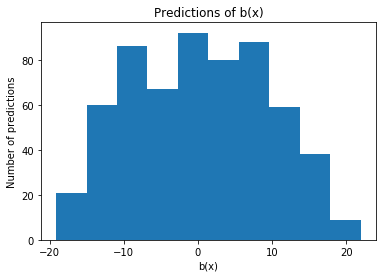

In [44]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import matplotlib.pyplot as plt
bx = logregr.intercept_ + np.dot(X_test, (logregr.coef_).T)
plt.hist(bx.flatten())
plt.xlabel('b(x)')
plt.ylabel('Number of predictions')
plt.title('Predictions of b(x)')
plt.show()

а)Предсказания принимают значения примерно от -15 до 20

б)Похожи, чем дальше от 0(влево или вправо),, тем больше вероятность принадлежности к классу 0 или 1

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

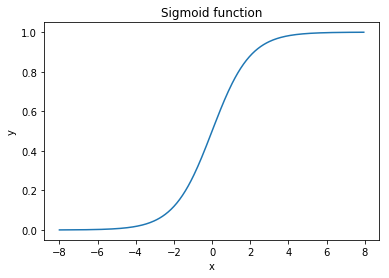

In [45]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 
x = np.arange(-8, 8, 0.05)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Эта функция(кривая роста вероятности) показывает вероятность принадлежности к положительному классу, чем больше x, тем больше уверенность в ответе(y)

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

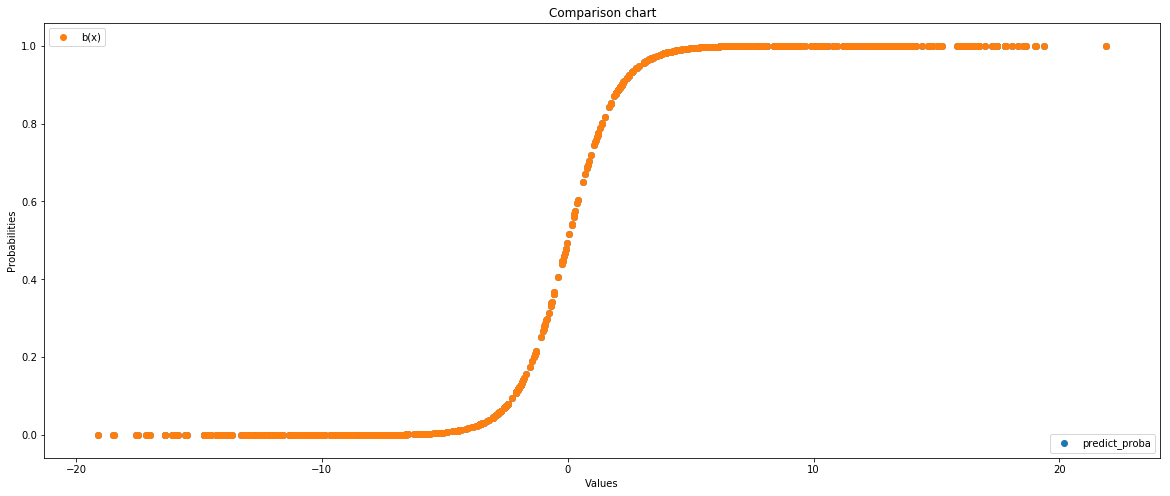

In [46]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(20, 8))
line2 = plt.scatter(bx, yproba, label = 'predict_proba')
line1 = plt.scatter(bx, sigmoid(bx), label = 'b(x)')
plt.xlabel('Values')
plt.ylabel('Probabilities')
plt.title('Comparison chart')
first_legend = plt.legend(handles=[line1], loc=2)
ax = plt.gca().add_artist(first_legend)
plt.legend(handles=[line2], loc=4)
plt.show()

Значения совпали

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

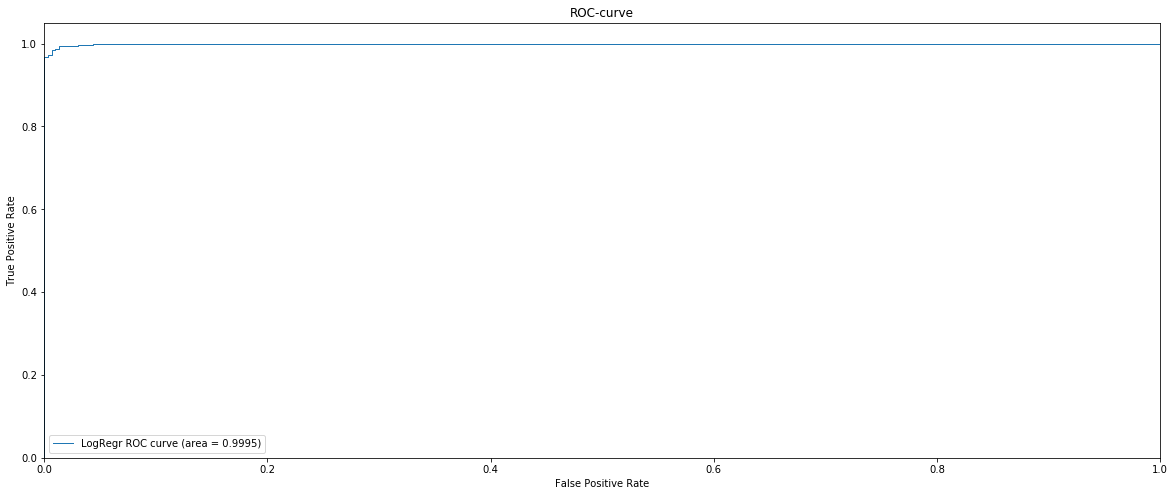

In [47]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import precision_recall_curve, roc_curve, auc

def generate_metrics(prediction):#Функция с семинара
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

prediction = logregr.predict_proba(X_test)
lfpr, ltpr, lra = generate_metrics(prediction)

plt.figure(figsize=(20, 8))
plt.plot(lfpr[1], ltpr[1], lw=1, label='LogRegr ROC curve (area = %0.4f)' % lra[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend(loc='best')
plt.show()

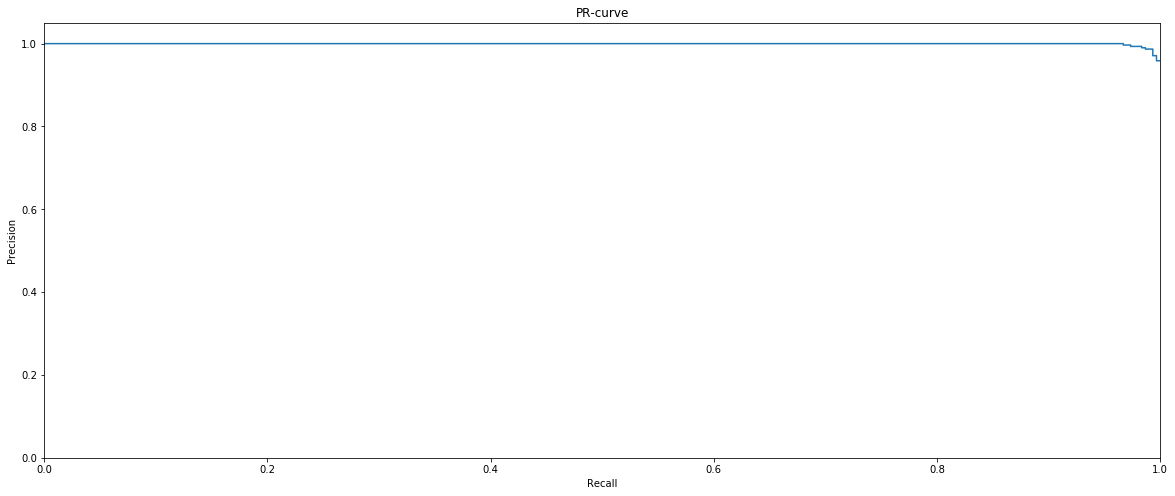

In [48]:
precision, recall, _ = precision_recall_curve(y_test, yproba)
plt.figure(figsize=(20, 8))
plt.plot(recall, precision)
plt.title('PR-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

### 4. Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$



Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.
Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.
Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково.

В качестве критерия останова необходимо использовать (одновременно):

- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В loss_history необходимо сохранять вычисленное на каждой итерации значение функции потерь.

In [49]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3, st_w=0):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        y: type of starting weights (0 - zeros, another - random)
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.required_iter = 0
        self.st_w = st_w
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        if self.st_w == 0:
            self.w = np.zeros(X.shape[1])
        else:
            self.w = np.random.rand(X.shape[1])
        self.loss_history = []
        w_current = np.copy(self.w)
        for step in range(self.max_iter):
            w_current = self.w - self.alpha * (self.calc_gradient(X, y))
            self.loss_history.append(self.calc_loss(X, y))
            self.required_iter = step + 1
            if np.linalg.norm(w_current - self.w) < self.tolerance:
                break
            self.w = np.copy(w_current)
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        P1 = 1/(1+np.exp(-np.dot(X, self.w)))
        Pm1 = -P1 + 1
        return np.column_stack((Pm1, P1))
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return (-(np.dot(X.T, y))/(1 + np.exp(np.dot(y, np.dot(X, self.w)))) + self.lambda_2*self.w)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return ((1/X.shape[0])*np.log(1 + np.exp(-np.dot(y, np.dot(X, self.w)))) + (self.lambda_2/2)*(np.linalg.norm(self.w)**2))

- Примените логистическую регресиию на той же выборке.
- Посчитайте качество по тем же метрикам.
- Визуализируйте изменение значений функции потерь от номера итераций.

### Инициализируем веса нулями

In [50]:
MyLog = LogReg()
MyLog.fit(X_train, y_train)
pred = MyLog.predict_proba(X_test)[:, 1]
print('ROC-AUC :' , roc_auc_score(y_test, pred))

ROC-AUC : 0.9951775634472643


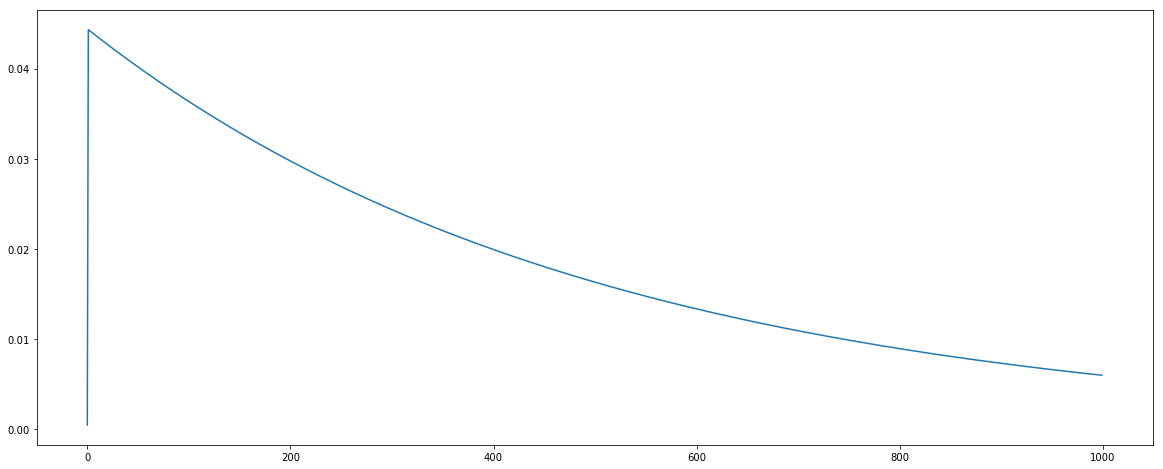

In [51]:
plt.figure(figsize=(20, 8))
it = np.arange(0, MyLog.required_iter)
plt.plot(it, MyLog.loss_history)
plt.show()

### Инициализируем веса случайными числами

In [52]:
MyLogR = LogReg(st_w = 1)
MyLogR.fit(X_train, y_train)
predR = MyLogR.predict_proba(X_test)[:, 1]
print('ROC-AUC :' , roc_auc_score(y_test, predR))

ROC-AUC : 0.601460064891773


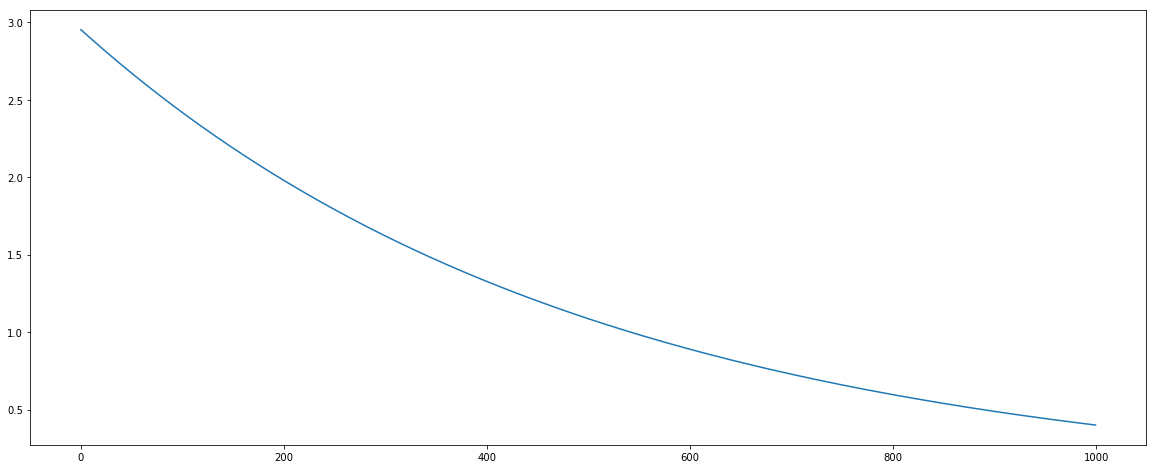

In [53]:
plt.figure(figsize=(20, 8))
it = np.arange(0, MyLogR.required_iter)
plt.plot(it, MyLogR.loss_history)
plt.show()

### 5. Бонусное задание 2. 

[0.002 бонусных балла]

Напишите свой любимый текстовый (у нас же домашнее задание про тексты, ощущаете иронию) мем или анекдот

Хорошо, что пятница сегодня, а не завтра, как вчера